In [2]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

In [3]:
car_rental_data = pd.read_csv("../Data/car_2018 2019.csv")

In [4]:
car_rental_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27633 entries, 0 to 27632
Data columns (total 17 columns):
Unnamed: 0            27633 non-null int64
AVG_BEFORE_DAYS       27633 non-null float64
AVG_FARE              27633 non-null float64
CHANGE PERCENT        27633 non-null float64
COLLECT_DATE          27633 non-null object
HOLIDAY               27633 non-null int64
HOLIDAY AFTER         27633 non-null int64
HOLIDAY BEFORE        27633 non-null int64
LOR                   27633 non-null int64
MAX_FARE              27633 non-null float64
MEDIAN_FARE           27633 non-null float64
MIN_FARE              27633 non-null float64
OUTSIPP               27633 non-null object
PICKUP_DATE           27633 non-null object
TIME BEFORE RENTAL    27633 non-null int64
WEEKEND               27633 non-null int64
CHANGE                27633 non-null object
dtypes: float64(6), int64(7), object(4)
memory usage: 3.6+ MB


In [5]:
# Coverting column types and dropping the right columns
car_rental_data["COLLECT_DATE"] = pd.to_datetime(car_rental_data["COLLECT_DATE"], format='%Y-%m-%d')
car_rental_data["PICKUP_DATE"] = pd.to_datetime(car_rental_data["PICKUP_DATE"], format='%Y-%m-%d')
car_rental_data.drop(columns = "Unnamed: 0", inplace = True)

# Sorting by pickup date
car_rental_data.sort_values(by = "PICKUP_DATE", inplace=True)

In [6]:
car_rental_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27633 entries, 0 to 10567
Data columns (total 16 columns):
AVG_BEFORE_DAYS       27633 non-null float64
AVG_FARE              27633 non-null float64
CHANGE PERCENT        27633 non-null float64
COLLECT_DATE          27633 non-null datetime64[ns]
HOLIDAY               27633 non-null int64
HOLIDAY AFTER         27633 non-null int64
HOLIDAY BEFORE        27633 non-null int64
LOR                   27633 non-null int64
MAX_FARE              27633 non-null float64
MEDIAN_FARE           27633 non-null float64
MIN_FARE              27633 non-null float64
OUTSIPP               27633 non-null object
PICKUP_DATE           27633 non-null datetime64[ns]
TIME BEFORE RENTAL    27633 non-null int64
WEEKEND               27633 non-null int64
CHANGE                27633 non-null object
dtypes: datetime64[ns](2), float64(6), int64(6), object(2)
memory usage: 3.6+ MB


In [7]:
car_rental_data.head()

,AVG_BEFORE_DAYS,AVG_FARE,CHANGE PERCENT,COLLECT_DATE,HOLIDAY,HOLIDAY AFTER,HOLIDAY BEFORE,LOR,MAX_FARE,MEDIAN_FARE,MIN_FARE,OUTSIPP,PICKUP_DATE,TIME BEFORE RENTAL,WEEKEND,CHANGE
0,43.655,41.51,-0.046834,2018-01-01,0,0,0,7,107.6100,26.603125,18.355556,CCAR,2018-01-31,30,0,Decrease
21978,33.960,33.71,-0.007308,2018-01-01,0,0,0,5,61.2550,31.960750,19.011250,CDAR,2018-01-31,30,0,Decrease
22019,33.630,33.45,-0.005324,2018-01-01,0,0,0,5,61.2150,31.902875,18.973750,EDAR,2018-01-31,30,0,Decrease
7748,91.080,85.87,-0.054107,2018-01-01,0,0,0,7,196.4925,70.552083,37.237778,LCAR,2018-01-31,30,0,Decrease
22060,38.385,38.31,-0.001950,2018-01-01,0,0,0,5,63.9250,39.107750,21.138750,FDAR,2018-01-31,30,0,No change


*****
Reduce outsipp to 5 logical categories

In [85]:
temp1 = car_rental_data.loc[:,["OUTSIPP" , "AVG_FARE"]].groupby("OUTSIPP")["AVG_FARE"].mean()
temp1[:5]

OUTSIPP
CCAR     63.689617
CDAR     59.771463
CFAR     70.709957
CTAR    122.003715
ECAR     63.491191
Name: AVG_FARE, dtype: float64

In [86]:
temp1.describe()

count     59.000000
mean     108.767105
std       80.779448
min       49.092145
25%       67.115521
50%       85.943560
75%      120.135808
max      509.005000
Name: AVG_FARE, dtype: float64

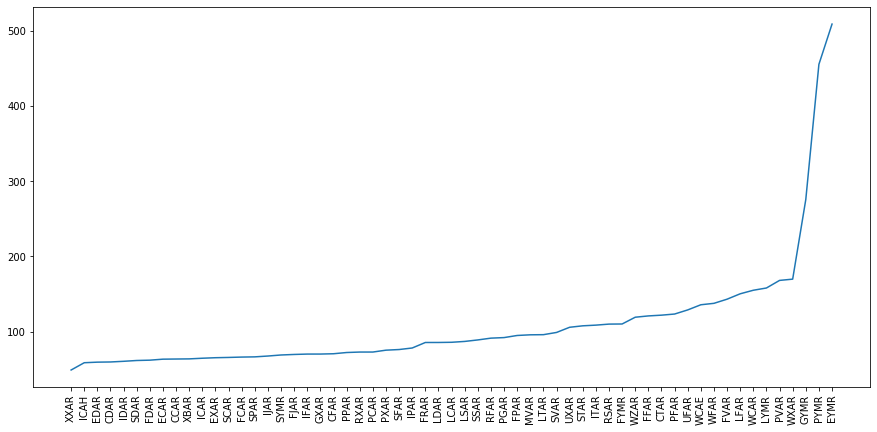

In [87]:
plt.figure(figsize=(15,7))
plt.plot(temp1.sort_values())
plt.xticks(rotation = 90)
plt.show()

In [88]:
temp1 = temp1.drop(["GYMR" , "PYMR" , "EYMR"] , axis = 0)

In [89]:
# premium > luxury > midrange> economy > basic

ref1 = pd.qcut(temp , 4 , labels = [ "basic" , "economy" , "midrange" , "luxury"])
ref1 = ref.append(pd.Series( data = ["premium","premium","premium"] , index =["GYMR" , "PYMR" , "EYMR"]))
ref1[:5]

CCAR      basic
CDAR      basic
CFAR    economy
CTAR     luxury
ECAR      basic
dtype: object

*****
Second scheme

In [106]:
temp2 = car_rental_data.loc[:,["OUTSIPP" , "AVG_FARE"]].groupby("OUTSIPP")["AVG_FARE"].mean()
ref = temp2.sort_values().reset_index()
ref2 = pd.Series( data = ref.index/sum(ref.index) , index=ref["OUTSIPP"])
ref2[:5]

OUTSIPP
XXAR    0.000000
ICAH    0.000584
EDAR    0.001169
CDAR    0.001753
IDAR    0.002338
dtype: float64

In [ ]:
#Choose ref1 or ref2
ref = ref1

In [75]:
car_rental_data["new_OUTSIPP"] = ref[car_rental_data["OUTSIPP"]].to_list()

In [108]:
orig_car_rental_data = car_rental_data[:]

In [112]:
car_rental_data = car_rental_data.drop(columns = "OUTSIPP")
car_rental_data.columns

Index(['AVG_BEFORE_DAYS', 'AVG_FARE', 'CHANGE PERCENT', 'COLLECT_DATE',
       'HOLIDAY', 'HOLIDAY AFTER', 'HOLIDAY BEFORE', 'LOR', 'MAX_FARE',
       'MEDIAN_FARE', 'MIN_FARE', 'PICKUP_DATE', 'TIME BEFORE RENTAL',
       'WEEKEND', 'CHANGE', 'new_OUTSIPP'],
      dtype='object')

In [113]:
car_rental_data.head()

,AVG_BEFORE_DAYS,AVG_FARE,CHANGE PERCENT,COLLECT_DATE,HOLIDAY,HOLIDAY AFTER,HOLIDAY BEFORE,LOR,MAX_FARE,MEDIAN_FARE,MIN_FARE,PICKUP_DATE,TIME BEFORE RENTAL,WEEKEND,CHANGE,new_OUTSIPP
0,43.655,41.51,-0.046834,2018-01-01,0,0,0,7,107.6100,26.603125,18.355556,2018-01-31,30,0,Decrease,basic
21978,33.960,33.71,-0.007308,2018-01-01,0,0,0,5,61.2550,31.960750,19.011250,2018-01-31,30,0,Decrease,basic
22019,33.630,33.45,-0.005324,2018-01-01,0,0,0,5,61.2150,31.902875,18.973750,2018-01-31,30,0,Decrease,basic
7748,91.080,85.87,-0.054107,2018-01-01,0,0,0,7,196.4925,70.552083,37.237778,2018-01-31,30,0,Decrease,midrange
22060,38.385,38.31,-0.001950,2018-01-01,0,0,0,5,63.9250,39.107750,21.138750,2018-01-31,30,0,No change,basic


In [114]:
car_rental_data.isnull().sum()

AVG_BEFORE_DAYS       0
AVG_FARE              0
CHANGE PERCENT        0
COLLECT_DATE          0
HOLIDAY               0
HOLIDAY AFTER         0
HOLIDAY BEFORE        0
LOR                   0
MAX_FARE              0
MEDIAN_FARE           0
MIN_FARE              0
PICKUP_DATE           0
TIME BEFORE RENTAL    0
WEEKEND               0
CHANGE                0
new_OUTSIPP           0
dtype: int64

In [115]:
car_rental_data.dropna(inplace=True)

In [116]:
print("Min: " , min(car_rental_data["PICKUP_DATE"]), "\nMax: ", max(car_rental_data["PICKUP_DATE"]))

Min:  2018-01-31 00:00:00 
Max:  2020-01-29 00:00:00


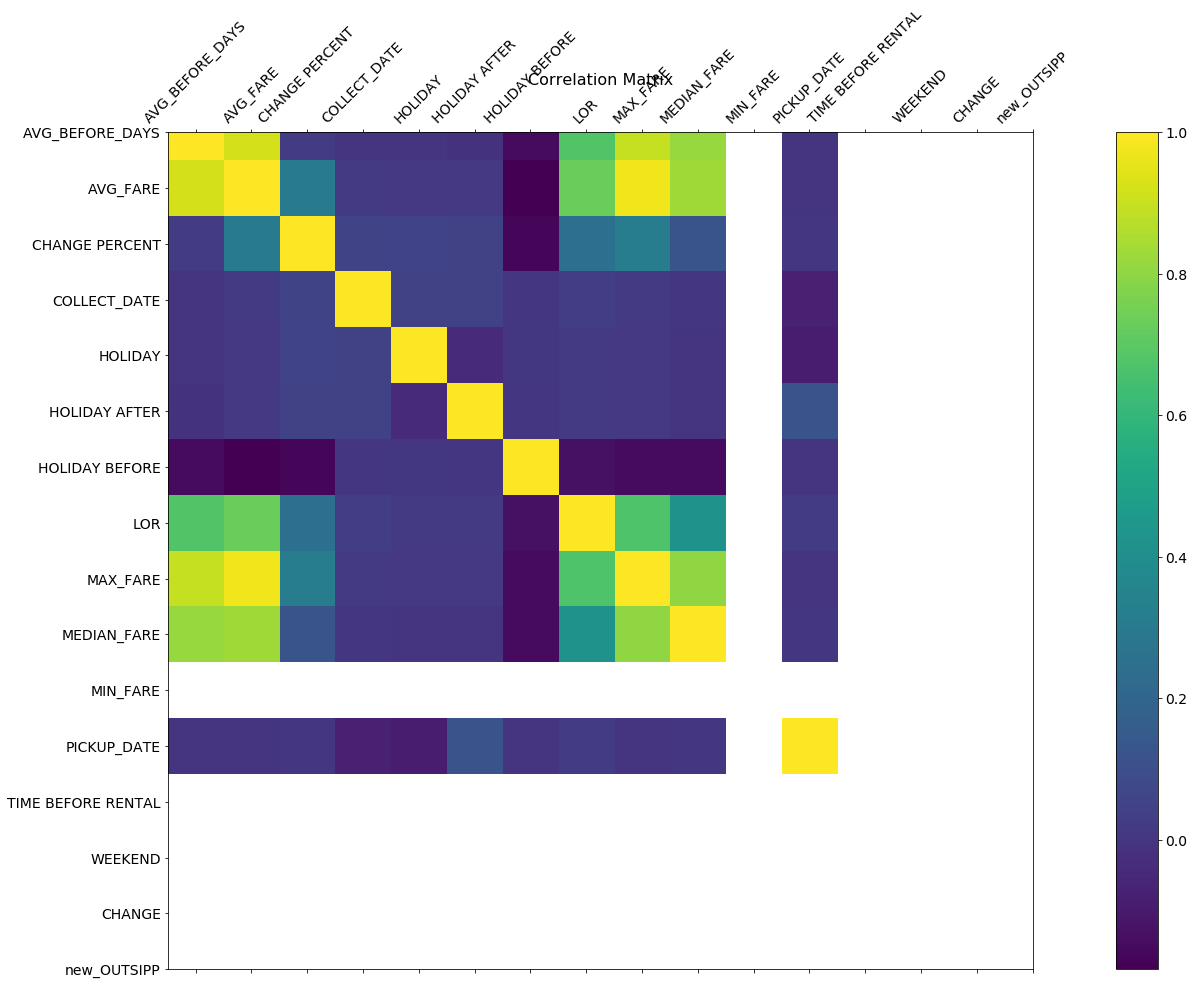

In [117]:
# Checking for correlations
f = plt.figure(figsize=(30, 15))
plt.matshow(car_rental_data.corr(), fignum=f.number)
plt.xticks(range(car_rental_data.shape[1]), car_rental_data.columns, fontsize=14, rotation=45)
plt.yticks(range(car_rental_data.shape[1]), car_rental_data.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

### are we dropping any columns based on corr? Why is NaN

In [118]:
corr = car_rental_data.corr()
corr.style.background_gradient(cmap='coolwarm')

E:\Anaconda\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,AVG_BEFORE_DAYS,AVG_FARE,CHANGE PERCENT,HOLIDAY,HOLIDAY AFTER,HOLIDAY BEFORE,LOR,MAX_FARE,MEDIAN_FARE,MIN_FARE,TIME BEFORE RENTAL,WEEKEND
AVG_BEFORE_DAYS,1,0.925588,0.0233606,-0.00604716,-0.00636405,-0.0089334,-0.146722,0.676672,0.8941,0.817995,nan,0.000861876
AVG_FARE,0.925588,1,0.30424,0.0191693,0.0135952,0.0151823,-0.182936,0.731074,0.973938,0.829782,nan,0.000387366
CHANGE PERCENT,0.0233606,0.30424,1,0.0590312,0.0567447,0.0445912,-0.164509,0.249769,0.317351,0.124882,nan,0.00225543
HOLIDAY,-0.00604716,0.0191693,0.0590312,1,0.0450648,0.0457909,0.0025597,0.030388,0.0203723,0.00229322,nan,-0.0724647
HOLIDAY AFTER,-0.00636405,0.0135952,0.0567447,0.0450648,1,-0.0357195,0.00995217,0.0160703,0.0129101,0.000372585,nan,-0.0873656
HOLIDAY BEFORE,-0.0089334,0.0151823,0.0445912,0.0457909,-0.0357195,1,0.00541347,0.0177428,0.0137815,-0.000922489,nan,0.118811
LOR,-0.146722,-0.182936,-0.164509,0.0025597,0.00995217,0.00541347,1,-0.129892,-0.150395,-0.146925,nan,0.0012867
MAX_FARE,0.676672,0.731074,0.249769,0.030388,0.0160703,0.0177428,-0.129892,1,0.674667,0.423506,nan,0.0212824
MEDIAN_FARE,0.8941,0.973938,0.317351,0.0203723,0.0129101,0.0137815,-0.150395,0.674667,1,0.805155,nan,0.000451728
MIN_FARE,0.817995,0.829782,0.124882,0.00229322,0.000372585,-0.000922489,-0.146925,0.423506,0.805155,1,nan,0.00315581


# Extracting, converting the features

In [119]:
# Extracting year, month and date from pickup date
car_rental_data["PICKUP_DATE_YEAR"] = pd.DatetimeIndex(car_rental_data["PICKUP_DATE"]).year
car_rental_data["PICKUP_DATE_MONTH"] = pd.DatetimeIndex(car_rental_data["PICKUP_DATE"]).month
car_rental_data["PICKUP_DATE_DATE"] = pd.DatetimeIndex(car_rental_data["PICKUP_DATE"]).day

In [121]:
# converting car_type to one-hot encoded format
car_rental_data = pd.get_dummies(car_rental_data, columns = ["new_OUTSIPP"] , prefix = "OUTSIPP", drop_first=True)

In [124]:
car_rental_data.head()

,AVG_BEFORE_DAYS,AVG_FARE,CHANGE PERCENT,COLLECT_DATE,HOLIDAY,HOLIDAY AFTER,HOLIDAY BEFORE,LOR,MAX_FARE,MEDIAN_FARE,...,TIME BEFORE RENTAL,WEEKEND,CHANGE,PICKUP_DATE_YEAR,PICKUP_DATE_MONTH,PICKUP_DATE_DATE,OUTSIPP_economy,OUTSIPP_luxury,OUTSIPP_midrange,OUTSIPP_premium
0,43.655,41.51,-0.046834,2018-01-01,0,0,0,7,107.6100,26.603125,...,30,0,Decrease,2018,1,31,0,0,0,0
21978,33.960,33.71,-0.007308,2018-01-01,0,0,0,5,61.2550,31.960750,...,30,0,Decrease,2018,1,31,0,0,0,0
22019,33.630,33.45,-0.005324,2018-01-01,0,0,0,5,61.2150,31.902875,...,30,0,Decrease,2018,1,31,0,0,0,0
7748,91.080,85.87,-0.054107,2018-01-01,0,0,0,7,196.4925,70.552083,...,30,0,Decrease,2018,1,31,0,0,1,0
22060,38.385,38.31,-0.001950,2018-01-01,0,0,0,5,63.9250,39.107750,...,30,0,No change,2018,1,31,0,0,0,0


In [125]:
car_rental_data.columns

Index(['AVG_BEFORE_DAYS', 'AVG_FARE', 'CHANGE PERCENT', 'COLLECT_DATE',
       'HOLIDAY', 'HOLIDAY AFTER', 'HOLIDAY BEFORE', 'LOR', 'MAX_FARE',
       'MEDIAN_FARE', 'MIN_FARE', 'PICKUP_DATE', 'TIME BEFORE RENTAL',
       'WEEKEND', 'CHANGE', 'PICKUP_DATE_YEAR', 'PICKUP_DATE_MONTH',
       'PICKUP_DATE_DATE', 'OUTSIPP_economy', 'OUTSIPP_luxury',
       'OUTSIPP_midrange', 'OUTSIPP_premium'],
      dtype='object')

In [126]:
# Filtering features and creating a copy
classification_drop_features = ["AVG_FARE","COLLECT_DATE","LOR", 'MAX_FARE', 'MEDIAN_FARE',
       'MIN_FARE', 'PICKUP_DATE', 'TIME BEFORE RENTAL', "CHANGE PERCENT"]
classification_data = car_rental_data.copy()
classification_data.drop(columns = classification_drop_features, inplace=True)

In [127]:
classification_data.head()

,AVG_BEFORE_DAYS,HOLIDAY,HOLIDAY AFTER,HOLIDAY BEFORE,WEEKEND,CHANGE,PICKUP_DATE_YEAR,PICKUP_DATE_MONTH,PICKUP_DATE_DATE,OUTSIPP_economy,OUTSIPP_luxury,OUTSIPP_midrange,OUTSIPP_premium
0,43.655,0,0,0,0,Decrease,2018,1,31,0,0,0,0
21978,33.960,0,0,0,0,Decrease,2018,1,31,0,0,0,0
22019,33.630,0,0,0,0,Decrease,2018,1,31,0,0,0,0
7748,91.080,0,0,0,0,Decrease,2018,1,31,0,0,1,0
22060,38.385,0,0,0,0,No change,2018,1,31,0,0,0,0


## Scaling data

In [128]:
classification_data.columns

Index(['AVG_BEFORE_DAYS', 'HOLIDAY', 'HOLIDAY AFTER', 'HOLIDAY BEFORE',
       'WEEKEND', 'CHANGE', 'PICKUP_DATE_YEAR', 'PICKUP_DATE_MONTH',
       'PICKUP_DATE_DATE', 'OUTSIPP_economy', 'OUTSIPP_luxury',
       'OUTSIPP_midrange', 'OUTSIPP_premium'],
      dtype='object')

In [129]:
# classification_data[["AVG_BEFORE_DAYS", "CHANGE PERCENT"]].head(20)
classification_data[["AVG_BEFORE_DAYS"]].head(20)

,AVG_BEFORE_DAYS
0,43.655
21978,33.960
22019,33.630
7748,91.080
22060,38.385
22101,36.450
22142,98.760
22183,38.665
7043,66.900
6338,45.075


In [130]:
# Scaling AVG_BEFORE_DAYS and CHANGE PERCENT
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# classification_data[["AVG_BEFORE_DAYS", "CHANGE PERCENT"]] = scaler.fit_transform(classification_data[["AVG_BEFORE_DAYS", "CHANGE PERCENT"]])
classification_data[["AVG_BEFORE_DAYS"]] = scaler.fit_transform(classification_data[["AVG_BEFORE_DAYS"]])

In [131]:
# classification_data[["AVG_BEFORE_DAYS", "CHANGE PERCENT"]].head(20)
classification_data[["AVG_BEFORE_DAYS"]].head(20)

,AVG_BEFORE_DAYS
0,-1.182342
21978,-1.410733
22019,-1.418507
7748,-0.065126
22060,-1.306491
22101,-1.352075
22142,0.115796
22183,-1.299895
7043,-0.634747
6338,-1.148891


# Machine Learning - Random Forest

In [132]:
# Extracting columns
classification_columns = [x for x in classification_data.columns.to_list() if x != "CHANGE"]
X = classification_data[classification_columns]
y = classification_data["CHANGE"]

In [133]:
X_train = X[:int(X.shape[0]*0.7)]
X_test = X[int(X.shape[0]*0.7):]
y_train = y[:int(X.shape[0]*0.7)]
y_test = y[int(X.shape[0]*0.7):]

In [134]:
# Checking correct sort order for train test splits
print("Min train date:", min(X_train["PICKUP_DATE_YEAR"]*100 + X_train["PICKUP_DATE_MONTH"]))
print("Max train date:", max(X_train["PICKUP_DATE_YEAR"]*100 + X_train["PICKUP_DATE_MONTH"]))

Min train date: 201801
Max train date: 201907


In [135]:
# Importing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, balanced_accuracy_score, make_scorer

In [136]:
# Default model
default = RandomForestClassifier(random_state=1)
default.fit(X_train, y_train)
default_pred = default.predict(X_test)
print("Accuracy for default Random Forest on CV data: ",accuracy_score(y_test,default_pred))
print()
print("Balanced Accuracy for default Random Forest on CV data: ",balanced_accuracy_score(y_test,default_pred))
print()
for x, y in zip(X_train.columns.tolist(), default.feature_importances_):
    print(x,round(y,2))
print()
print("AUC", roc_auc_score(y_test, default.predict_proba(X_test)[:,1]))

E:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy for default Random Forest on CV data:  0.37720144752714113

Balanced Accuracy for default Random Forest on CV data:  0.39815673076681374

AVG_BEFORE_DAYS 0.49
HOLIDAY 0.0
HOLIDAY AFTER 0.01
HOLIDAY BEFORE 0.01
WEEKEND 0.01
PICKUP_DATE_YEAR 0.02
PICKUP_DATE_MONTH 0.21
PICKUP_DATE_DATE 0.22
OUTSIPP_economy 0.01
OUTSIPP_luxury 0.01
OUTSIPP_midrange 0.01
OUTSIPP_premium 0.0



ValueError: multiclass format is not supported

In [ ]:
%timeit
rfc = RandomForestClassifier(random_state=1)
# Setting grid parameters
n_estimators = [100, 200, 300, 500, 800]
max_depth = [None, 4, 5, 6, 7, 8, 9, 10]
max_features = ['auto', 'sqrt', 'log2']
# min_samples_split = [2, 5, 10, 15, 100]
# min_samples_leaf = [1, 2, 5, 10]
criterion = ['gini', 'entropy']


parameters = dict(n_estimators = n_estimators, max_depth = max_depth,
                  criterion = criterion, max_features = max_features)

gridF = GridSearchCV(estimator = rfc, param_grid = parameters, cv = 5, verbose = 1,
                      n_jobs = -1)
gridF.fit(X_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


In [27]:
# Best parameters
gridF.best_params_

NameError: name 'gridF' is not defined

In [28]:
# Reinitializing the best model
best_model = RandomForestClassifier(random_state=1, criterion="entropy", max_depth=4, max_features="log2", 
                                   n_estimators=500)
best_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=4, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [29]:
pred = best_model.predict(X_test)
print("Accuracy for best Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for best Random Forest on CV data:  0.4384800965018094


In [30]:
print("Balanced Accuracy for default Random Forest on CV data: ",balanced_accuracy_score(y_test,pred))

Balanced Accuracy for default Random Forest on CV data:  0.3545006982085526


In [36]:
print("AUC", roc_auc_score(y_test, best_model.predict_proba(X_test)[:,1]))

ValueError: multi_class must be in ('ovo', 'ovr')

In [31]:
for x, y in zip(X_train.columns.tolist(), best_model.feature_importances_):
    print(x,round(y,2))

AVG_BEFORE_DAYS 0.14
HOLIDAY 0.01
HOLIDAY AFTER 0.01
HOLIDAY BEFORE 0.01
WEEKEND 0.0
PICKUP_DATE_YEAR 0.05
PICKUP_DATE_MONTH 0.23
PICKUP_DATE_DATE 0.08
OUTSIPP_CDAR 0.0
OUTSIPP_CFAR 0.0
OUTSIPP_CTAR 0.0
OUTSIPP_ECAR 0.0
OUTSIPP_EDAR 0.0
OUTSIPP_EXAR 0.0
OUTSIPP_EYMR 0.0
OUTSIPP_FCAR 0.0
OUTSIPP_FDAR 0.01
OUTSIPP_FFAR 0.01
OUTSIPP_FJAR 0.0
OUTSIPP_FPAR 0.0
OUTSIPP_FRAR 0.0
OUTSIPP_FVAR 0.01
OUTSIPP_FYMR 0.0
OUTSIPP_GXAR 0.0
OUTSIPP_GYMR 0.0
OUTSIPP_ICAH 0.0
OUTSIPP_ICAR 0.0
OUTSIPP_IDAR 0.0
OUTSIPP_IFAR 0.0
OUTSIPP_IJAR 0.0
OUTSIPP_IPAR 0.0
OUTSIPP_ITAR 0.0
OUTSIPP_LCAR 0.0
OUTSIPP_LDAR 0.0
OUTSIPP_LFAR 0.0
OUTSIPP_LSAR 0.0
OUTSIPP_LTAR 0.11
OUTSIPP_LYMR 0.0
OUTSIPP_MVAR 0.01
OUTSIPP_PCAR 0.0
OUTSIPP_PFAR 0.0
OUTSIPP_PGAR 0.0
OUTSIPP_PPAR 0.0
OUTSIPP_PVAR 0.01
OUTSIPP_PXAR 0.0
OUTSIPP_PYMR 0.0
OUTSIPP_RFAR 0.0
OUTSIPP_RSAR 0.14
OUTSIPP_RXAR 0.04
OUTSIPP_SCAR 0.0
OUTSIPP_SDAR 0.0
OUTSIPP_SFAR 0.0
OUTSIPP_SPAR 0.0
OUTSIPP_SSAR 0.01
OUTSIPP_STAR 0.01
OUTSIPP_SVAR 0.0
OUTSIPP_SYMR 0.0
OUTSI

## Extracting the data for classification

In [36]:
classification_data = classification_data.reset_index(drop=True)
classification_data.to_csv("classification_data.csv")